In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
train = pd.read_csv(r'processed_train.csv')
test = pd.read_csv(r'processed_test.csv')

In [37]:
print(train.shape)


(1460, 222)


# Dimensionality reduction

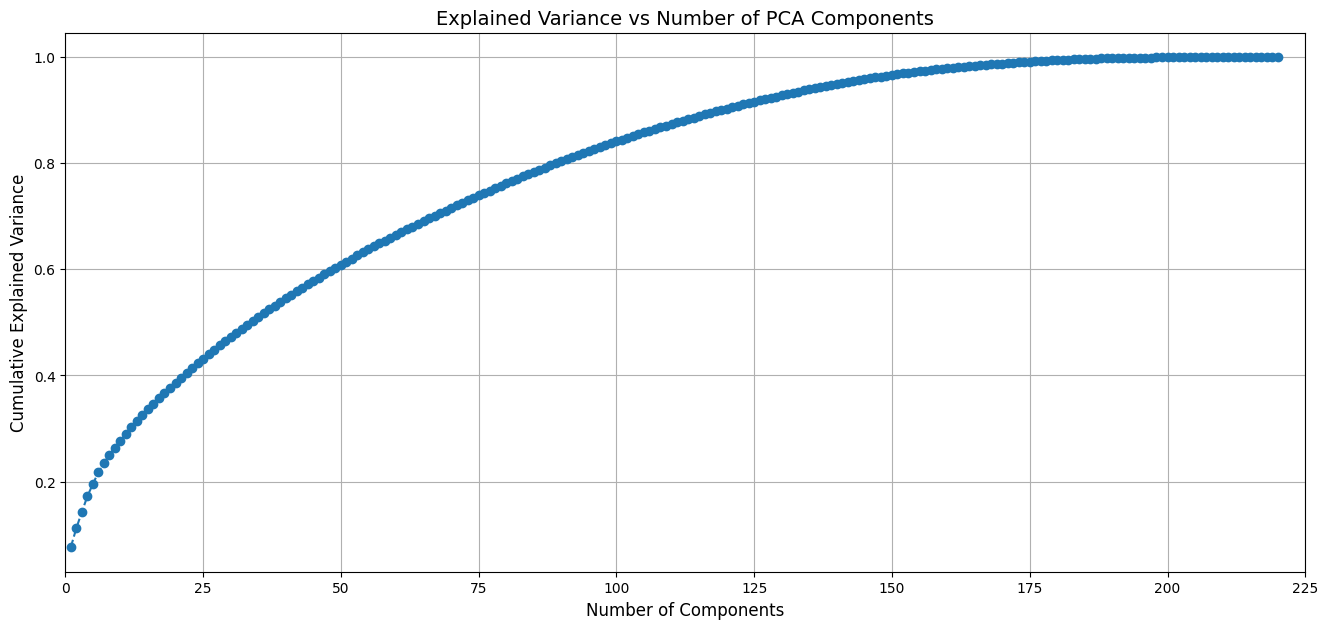

In [40]:
# Separate IDs and target
train_ids = train['Id']
test_ids = test['Id']

X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['Id'], axis=1)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca_full = pca.fit_transform(X_train_scaled)
X_test_pca_full = pca.transform(X_test_scaled)

# Explained variance visualization
variance = pca.explained_variance_ratio_
components = np.arange(1, len(variance) + 1)

plt.figure(figsize=(16, 7))
plt.plot(components, np.cumsum(variance), marker='o', linestyle='--')
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.xlabel("Number of Components", fontsize=12)
plt.title("Explained Variance vs Number of PCA Components", fontsize=14)
plt.grid(True)
plt.xlim(0, len(variance) + 5)
plt.show()

In [41]:
# Apply PCA with chosen number of components
pca_opt = PCA(n_components=0.99)
X_train_pca = pca_opt.fit_transform(X_train_scaled)
X_test_pca = pca_opt.transform(X_test_scaled)

X_train_final = pd.DataFrame(X_train_pca)
X_test_final = pd.DataFrame(X_test_pca)

print("Training shape:", X_train_final.shape)
print("Test shape:", X_test_final.shape)

Training shape: (1460, 173)
Test shape: (1459, 173)
